In [400]:
## I will try to understand how stochastic gradient descent works

import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt


In [401]:
# Create a random data set with 3 features and 1000 data points
size = 100000
dim = 3
X = np.random.normal(loc=0.0, scale=10.0, size= (size,dim))
# Lets us look at the dataset
X[1:4]

array([[ 14.5187495 , -21.4994033 ,   4.37068261],
       [ -4.02135985, -10.19399485,   5.42235842],
       [  1.22302566,  -1.22945505, -10.25978766]])

In [402]:
# create random labels( for now I am keeping it binary)
Y = np.random.choice([0, 1], size=(size,), p=[1./2, 1./2])
# Take a look
Y[1:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 0])

In [403]:
# this finction will return small batches of the data to be fed to the SGD function
cursor = 0

def feed(batch_size):
    assert size%batch_size == 0 ##to make sure perfect allocation of data
    global cursor
    x_train = X[cursor:cursor+batch_size]
    y_train = Y[cursor:cursor+batch_size]
    if cursor == size  :
        cursor = 0
    else :
        cursor += batch_size
    return x_train, y_train
    
    

In [404]:
# let us test our feed function
a,b = feed(1)
p,q = feed(1)
a == p

array([[False, False, False]], dtype=bool)

[ 0.83966154  0.67787042  0.33708725]
for stepsize 0.001


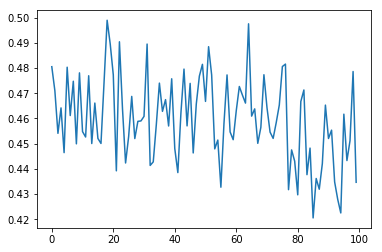

for stepsize 0.002


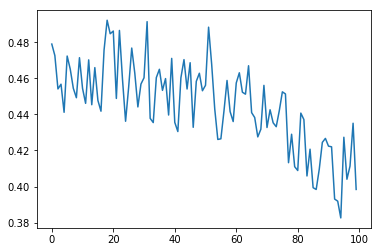

for stepsize 0.003


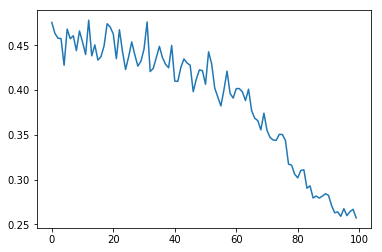

for stepsize 0.004


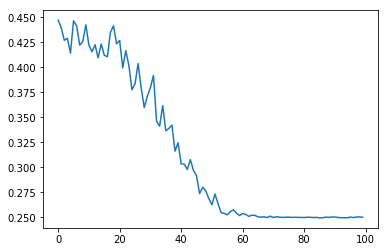

for stepsize 0.005


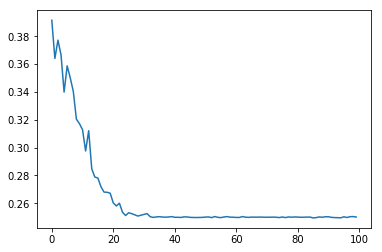

for stepsize 0.006


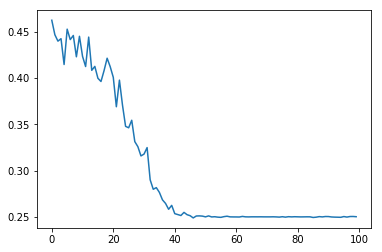

for stepsize 0.007


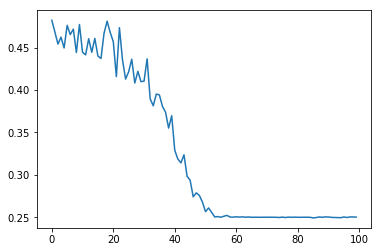

for stepsize 0.008


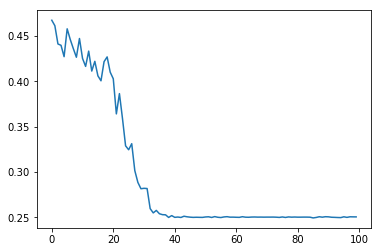

for stepsize 0.009


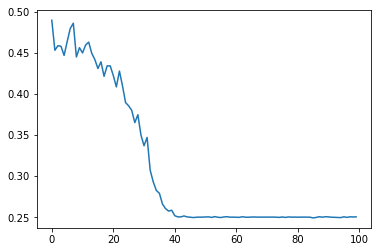

for stepsize 0.01


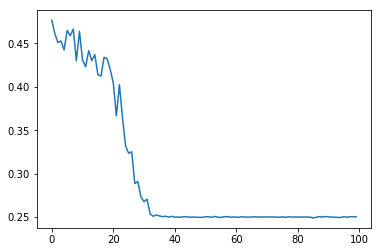

for stepsize 0.011


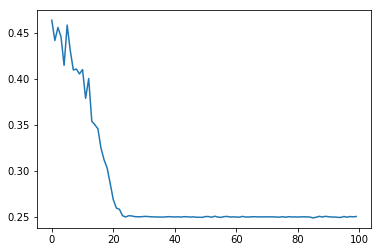

for stepsize 0.012


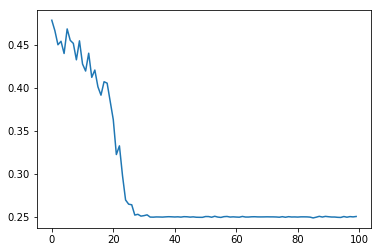

for stepsize 0.013


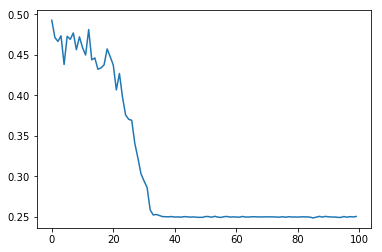

for stepsize 0.014


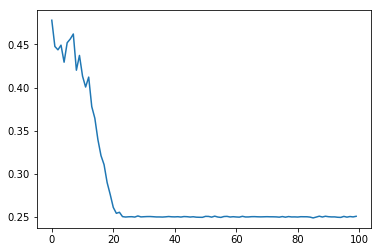

for stepsize 0.015


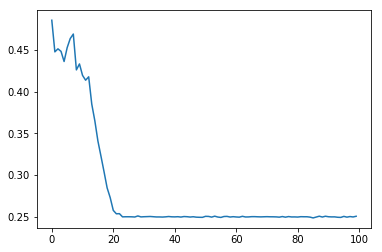

for stepsize 0.016


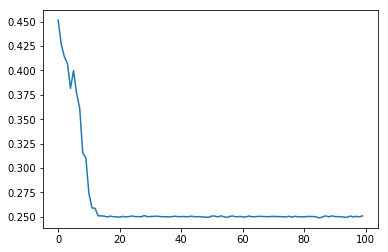

for stepsize 0.017


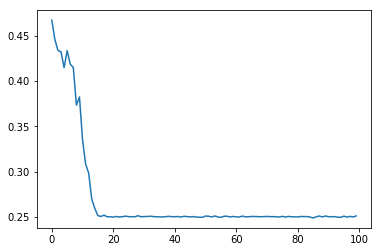

for stepsize 0.018


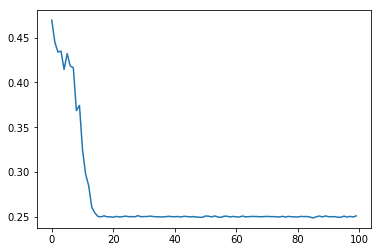

for stepsize 0.019


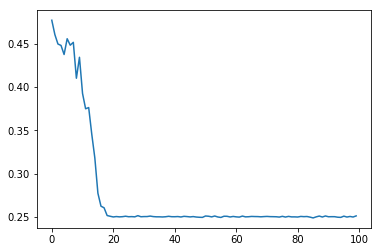

for stepsize 0.02


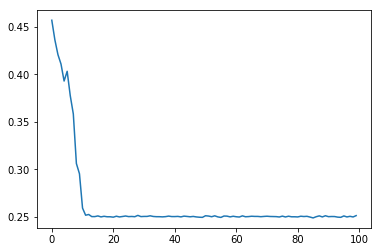

for stepsize 0.021


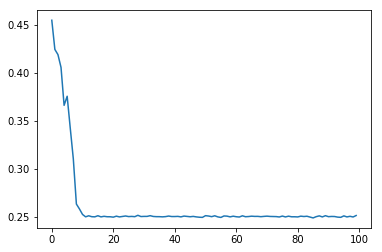

for stepsize 0.022


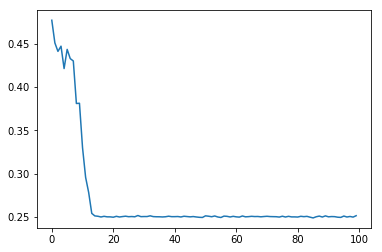

for stepsize 0.023


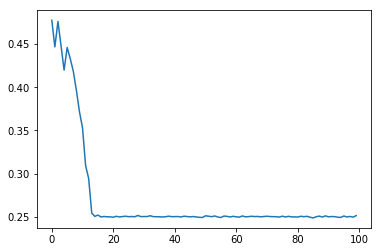

for stepsize 0.024


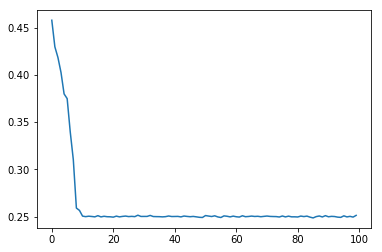

for stepsize 0.025


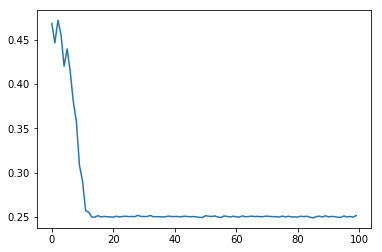

for stepsize 0.026


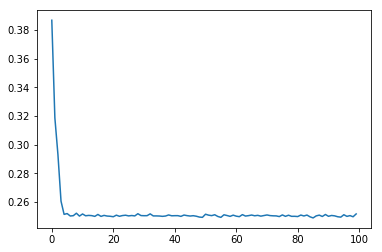

for stepsize 0.027


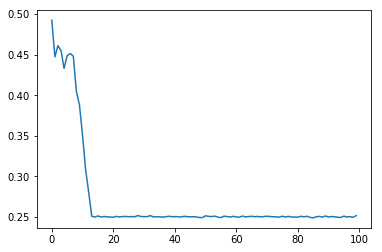

for stepsize 0.028


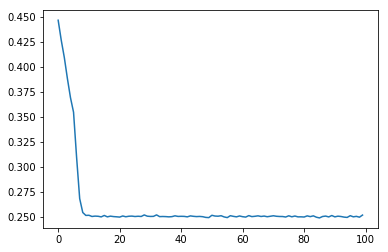

for stepsize 0.029


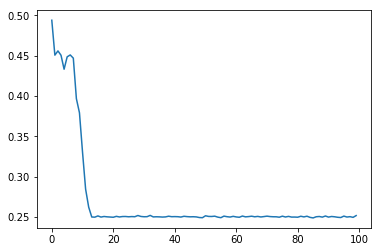

for stepsize 0.03


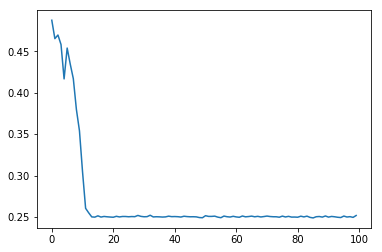

for stepsize 0.031


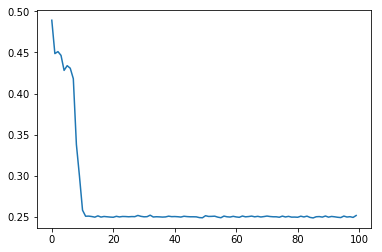

for stepsize 0.032


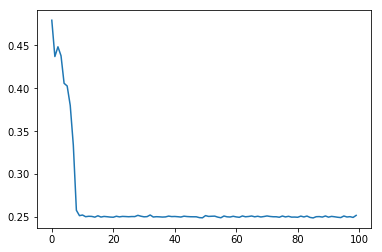

for stepsize 0.033


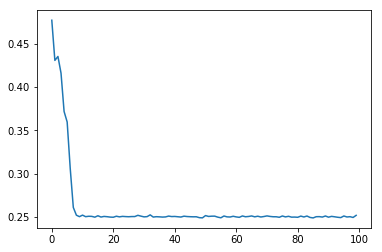

for stepsize 0.034


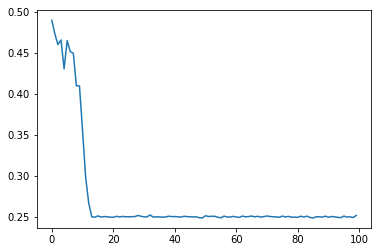

for stepsize 0.035


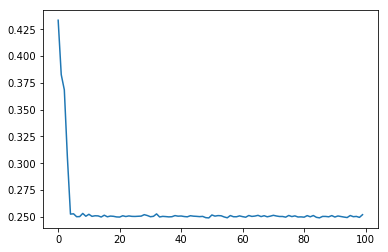

for stepsize 0.036


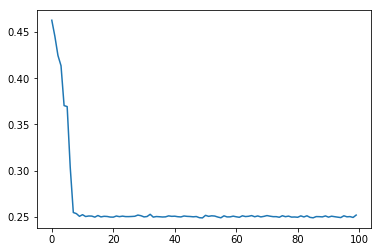

for stepsize 0.037


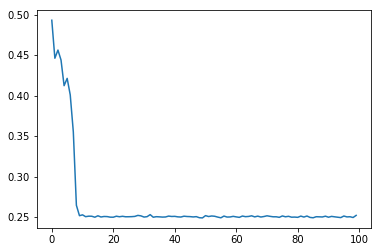

for stepsize 0.038


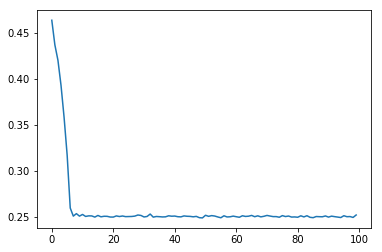

for stepsize 0.039


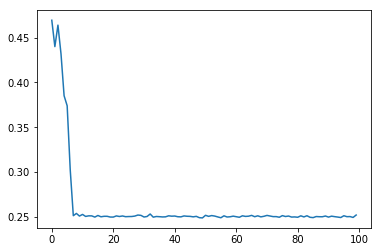

for stepsize 0.04


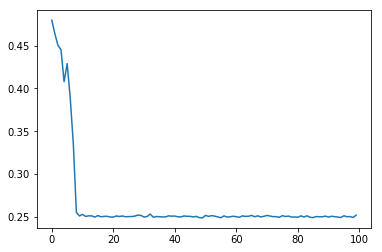

for stepsize 0.041


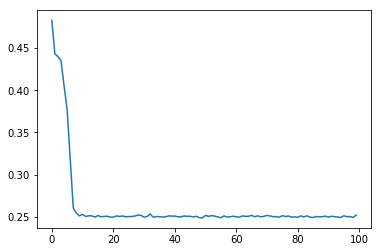

for stepsize 0.042


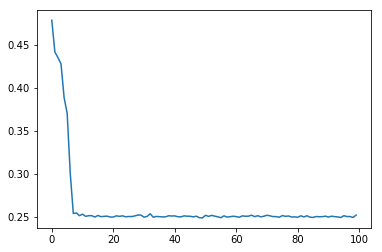

for stepsize 0.043


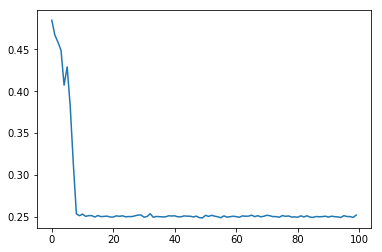

for stepsize 0.044


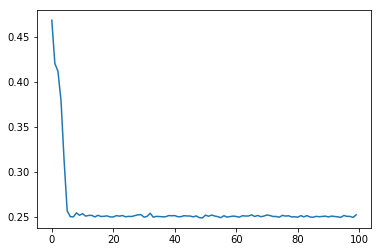

for stepsize 0.045


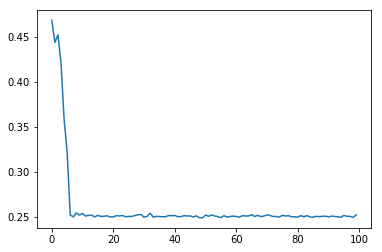

for stepsize 0.046


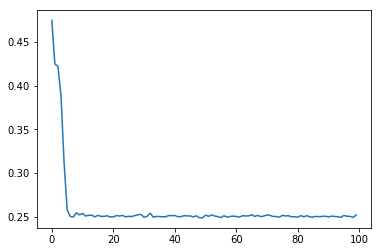

for stepsize 0.047


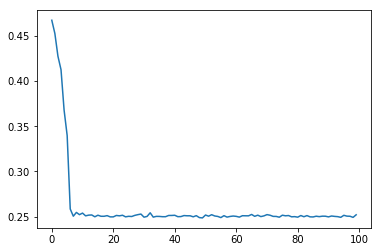

for stepsize 0.048


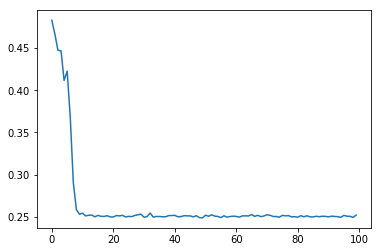

for stepsize 0.049


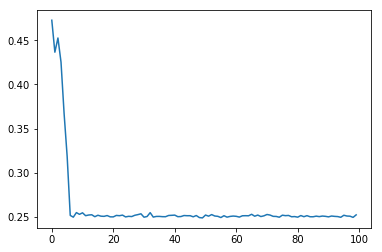

for stepsize 0.05


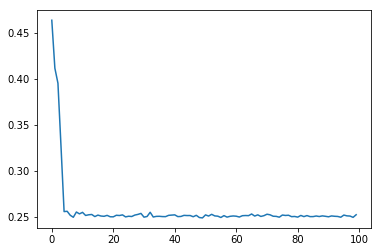

for stepsize 0.051


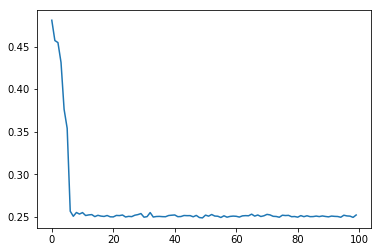

for stepsize 0.052


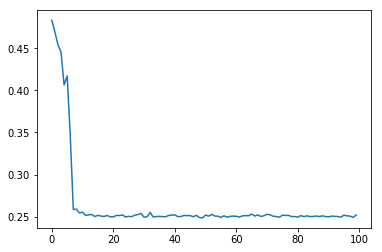

for stepsize 0.053


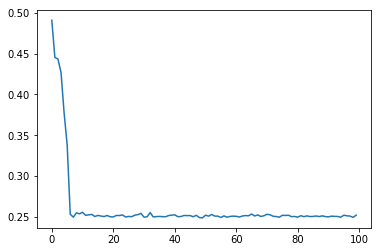

for stepsize 0.054


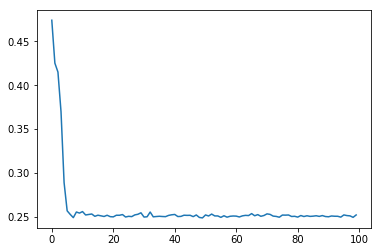

for stepsize 0.055


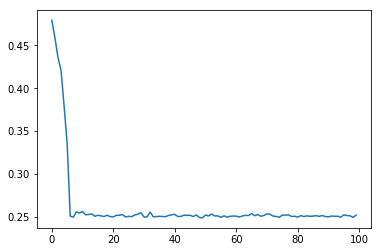

for stepsize 0.056


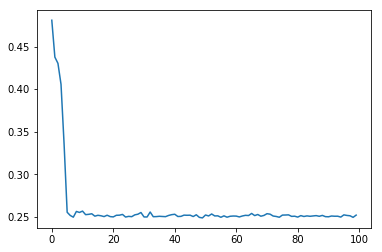

for stepsize 0.057


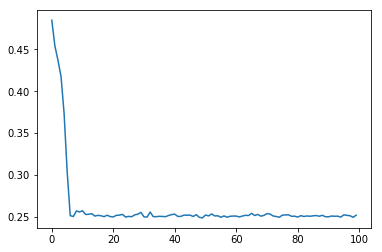

for stepsize 0.058


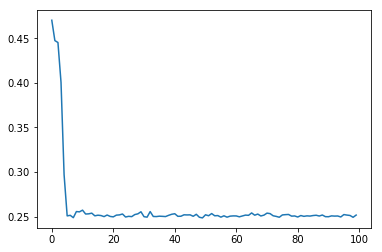

for stepsize 0.059


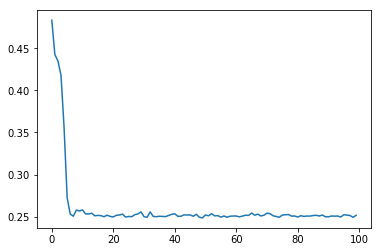

for stepsize 0.06


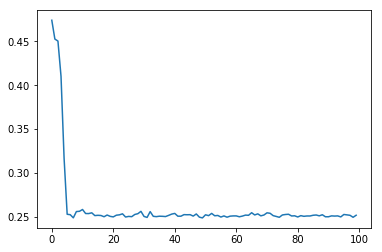

for stepsize 0.061


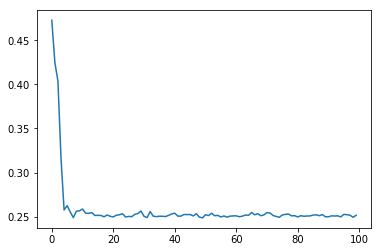

for stepsize 0.062


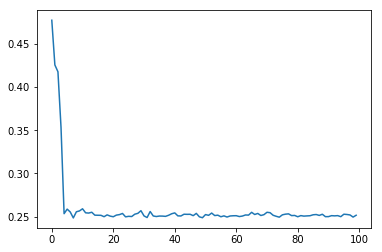

for stepsize 0.063


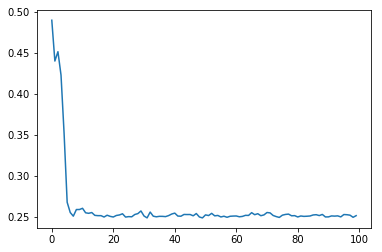

for stepsize 0.064


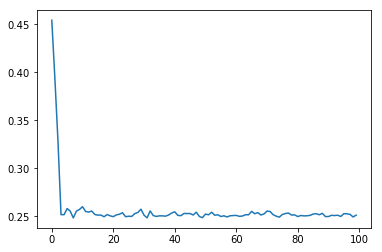

for stepsize 0.065


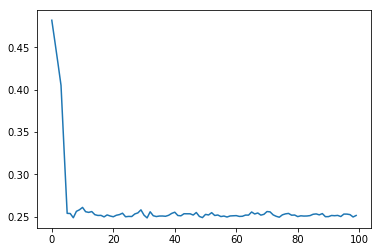

for stepsize 0.066


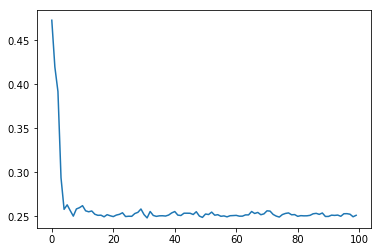

for stepsize 0.067


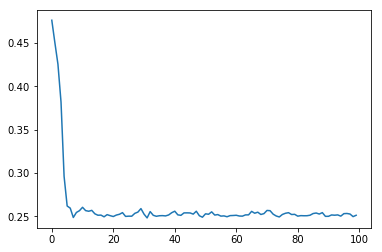

for stepsize 0.068


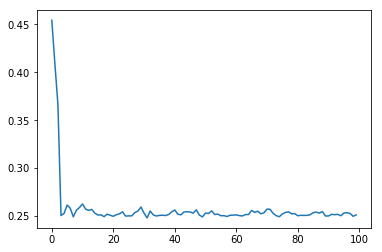

for stepsize 0.069


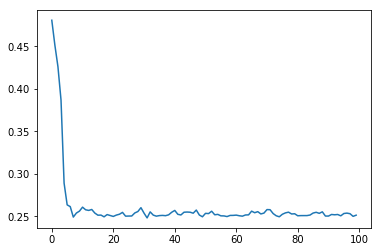

for stepsize 0.07


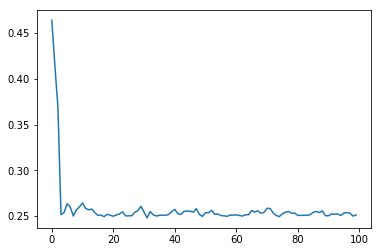

for stepsize 0.071


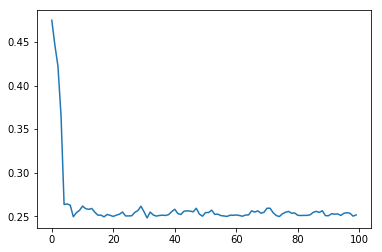

for stepsize 0.072


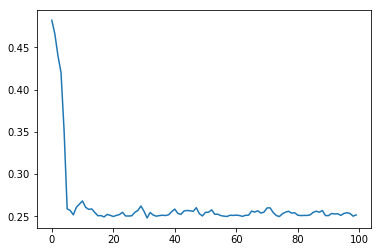

for stepsize 0.073


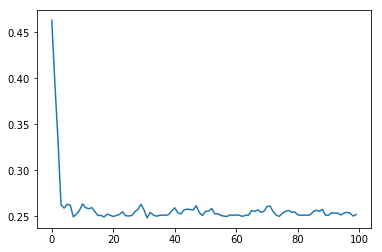

for stepsize 0.074


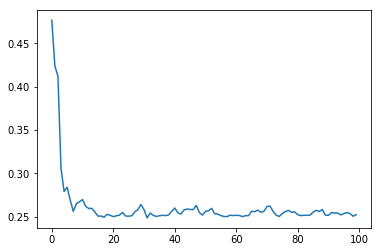

for stepsize 0.075


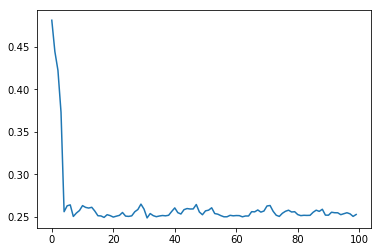

for stepsize 0.076


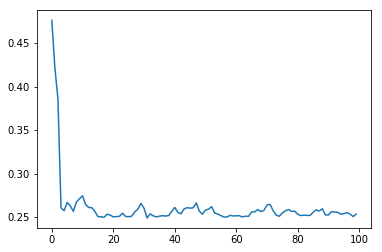

for stepsize 0.077


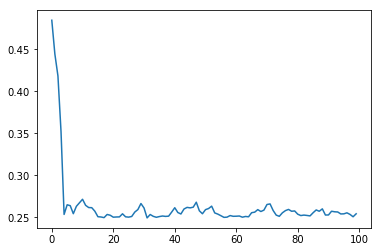

for stepsize 0.078


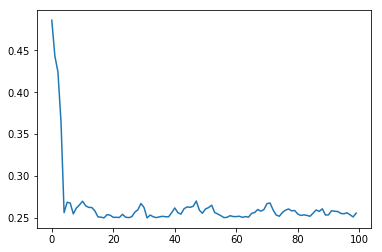

for stepsize 0.079


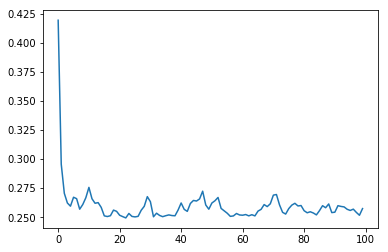

for stepsize 0.08


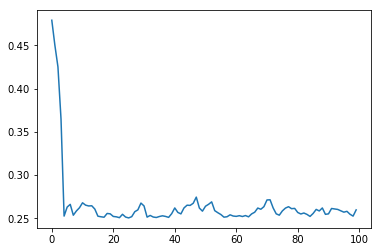

for stepsize 0.081


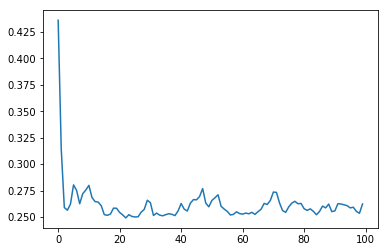

for stepsize 0.082


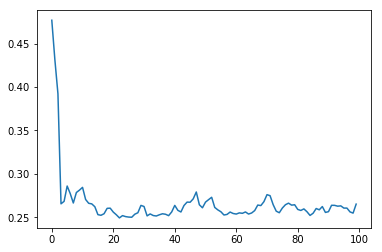

for stepsize 0.083


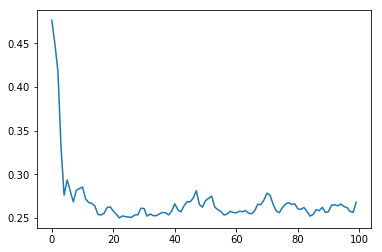

for stepsize 0.084


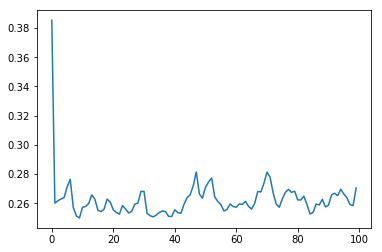

for stepsize 0.085


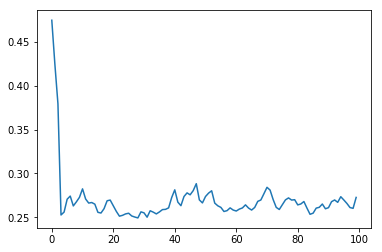

for stepsize 0.086


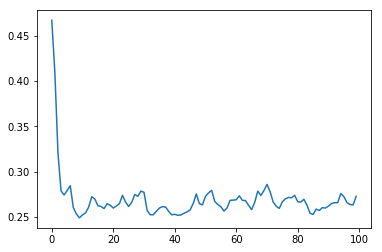

for stepsize 0.087


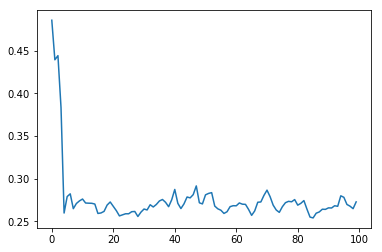

for stepsize 0.088


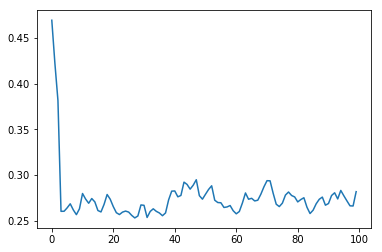

for stepsize 0.089


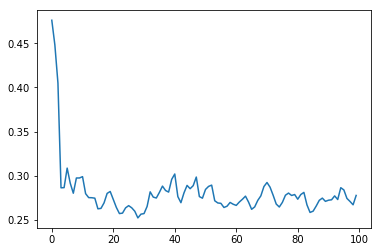

for stepsize 0.09


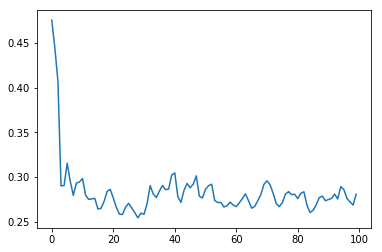

for stepsize 0.091


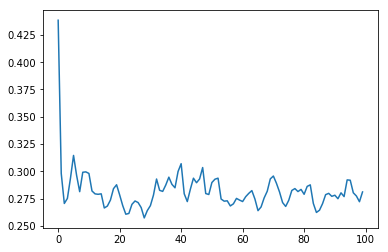

for stepsize 0.092


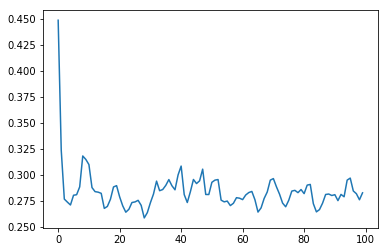

for stepsize 0.093


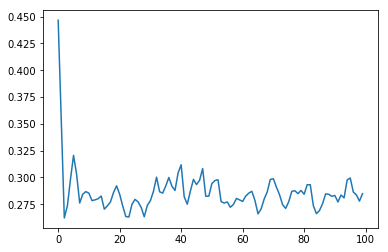

for stepsize 0.094


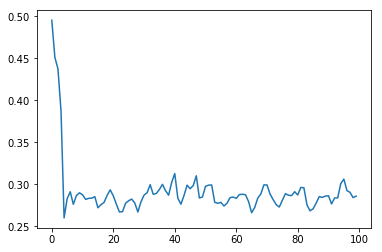

for stepsize 0.095


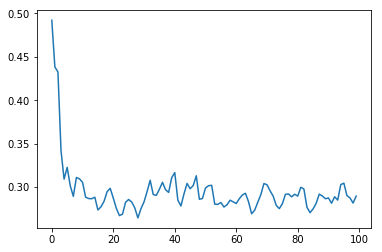

for stepsize 0.096


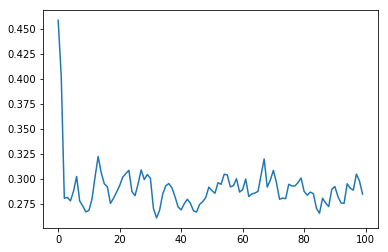

for stepsize 0.097


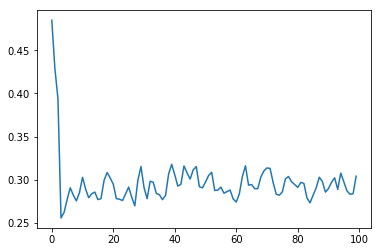

for stepsize 0.098


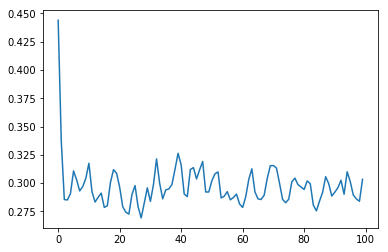

for stepsize 0.099


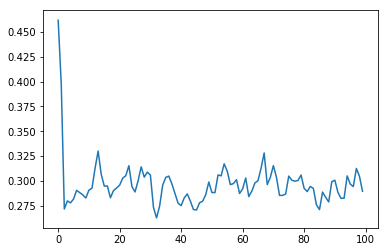

for stepsize 0.1


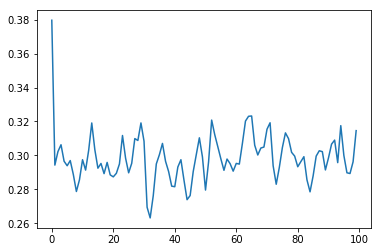

In [405]:
## from the above test we can be confident that the function feeds sequential data

cursor = 0
## Initializing parameters
B = np.random.uniform(size=(dim,))
print(B)

## activation finction for the logistic regression
def activation_sigmoid(p):

    return 1.0 / (1 + np.exp(-p))



def SGD(step_size, batch_size):
    x,y = feed(batch_size)
    global B
    logits = x.dot(B) ## dot product
    prediction = activation_sigmoid(logits) ## This gives prediction
    error = prediction - y ## or noise
    loss = np.sum(error ** 2)/batch_size ## finding average loss, this will ensure independence 
                                          # from batch size
    loss_list.append(loss)
    gradient = x.T.dot(error) / x.shape[0] ##To make it independent from batchsize? Ask professor!
    B += -(step_size * gradient)
    
## looping SGD for various step sizes    
for i in range(100):
    j = (i+1)/1000
    B = np.random.uniform(size=(dim,))
    cursor = 0
    loss_list = []
    for i  in range(100):
        SGD(j,1000) 
    print("for stepsize",j)

    plt.plot(loss_list)
    plt.show()


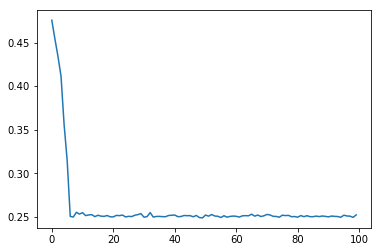

In [406]:
## After stepsize = 0.05 loss goes crazy

cursor = 0
B = np.random.uniform(size=(dim,))
loss_list = []
for i  in range(100):
    
    SGD(0.05,1000) 

plt.plot(loss_list)
plt.show()


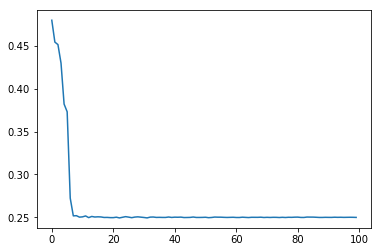

In [407]:
cursor = 0
learning_rate = 1
B = np.random.uniform(size=(dim,))
loss_list = []
for i  in range(100):
    if i <= 6:
        stsz = 0.05
    else:
        stsz = 0.05*((2+i)**(-learning_rate)) ## we start exponential decay after the minimum for 0.5 
                                               # is reached
    
    SGD(stsz,1000) 

plt.plot(loss_list)
plt.show()

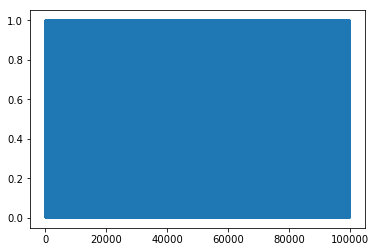

In [408]:
## let us see the effect of batch size

cursor = 0
learning_rate = 1
B = np.random.uniform(size=(dim,))
loss_list = []
for i  in range(100000):

    
    SGD(0.05,1) 

plt.plot(loss_list)
plt.show()


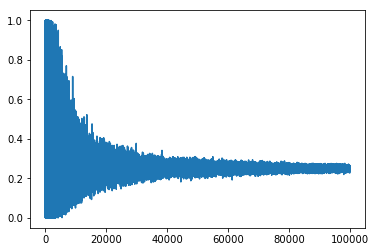

In [409]:

## the above flactuation is becuase the minimum is attained using one sample and thus
## is not generalized to the whole dataset
## now see the magic for exponential deacying stepsize
cursor = 0
learning_rate = 1
B = np.random.uniform(size=(dim,))
loss_list = []
for i  in range(100000):
    if i <= 6:
        stsz = 0.05
    else:
        stsz = 0.05*((2+i)**(-learning_rate))
    
    SGD(stsz,1) 

plt.plot(loss_list)
plt.show()

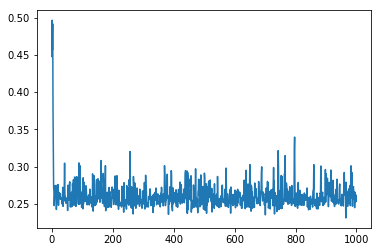

In [410]:
## the same case converged to or atleast seems to converge to the expected value

cursor = 0
learning_rate = 1
B = np.random.uniform(size=(dim,))
loss_list = []
for i  in range(1000):
   
    
    SGD(0.05,100) 

plt.plot(loss_list)
plt.show()

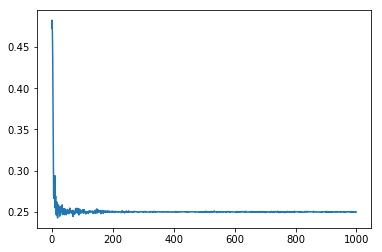

In [412]:
## we need a considerable subset to stop such flactuations
cursor = 0
learning_rate = 1
B = np.random.uniform(size=(dim,))
loss_list = []
for i  in range(1000):
    if i <= 6:
        stsz = 0.05
    else:
        stsz = 0.05*((2+i)**(-learning_rate))
    
    SGD(stsz,100) 

plt.plot(loss_list)
plt.show()

In [416]:
## one last experiment, let use to gradient descent for the whole dataset
def SGD(step_size):
    x = X
    y =Y
    global B
    logits = x.dot(B) ## dot product
    prediction = activation_sigmoid(logits) ## This gives prediction
    error = prediction - y ## or noise
    loss = np.sum(error ** 2)/size ## finding average loss, this will ensure independence 
                                          # from batch size
    loss_list.append(loss)
    gradient = x.T.dot(error) / x.shape[0] ##To make it independent from batchsize? Ask professor!
    B += -(step_size * gradient)

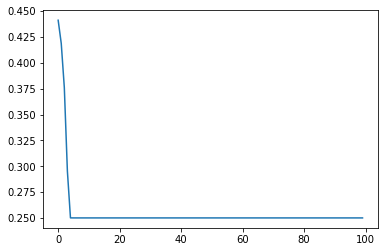

In [420]:
B = np.random.uniform(size=(dim,))
loss_list = []
for i  in range(100):
   
    
    SGD(0.05) 

plt.plot(loss_list)
plt.show()

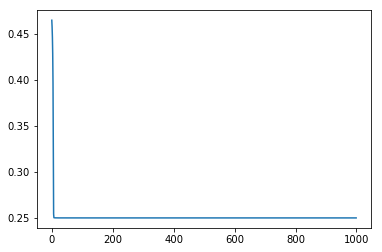

In [419]:
## Have a very smooth graph as we are using and thus generalizing for the complete dataset
##let se if using exponentially deacying steps would change anything

B = np.random.uniform(size=(dim,))
loss_list = []
for i  in range(1000):
    if i <= 6:
        stsz = 0.05
    else:
        stsz = 0.05*((2+i)**(-learning_rate))
    
    SGD(stsz) 

plt.plot(loss_list)
plt.show()

In [ ]:
### No idea why this happened. Ask professor!